# **Best Solution Search**

By J. Venkateswaran and R. Deval

**Objective:** In lab 06, we will use power of random search to identify best solution for a given test function. A test function is useful to evaluate characteristics of optimization algorithms.  
* For this purpose we will use a specific type of test function called Rosenbrock Function (a *non-linear* function) to determine best solution using random search.
* Furthermore, we will try to demostrate visualization of best solution (using Random Search) via., Pareto Frontier in Multi-Objective Problem (with constraints).

**Note:** Please go through the instructions carefully.

## **1. Single Objective Search**



### **Rosenbrock Function**
Let

$$f(x,y) = (1-x)^2 + 100(y-x^2)^2$$

with $x,y \in (-∞, ∞)$. It is known that $f(1,1) = 0$ is a global optima for Rosenbrock Function. Figure given below is a plot for Rosenbrock Function with colourmap as $log_{10}f(x,y)$.

More details [Click Here](https://en.wikipedia.org/wiki/Rosenbrock_function)



**Fig A: Contour Plot for Rosenbrock Function**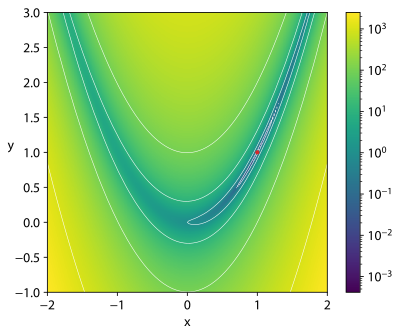


In this lab, we will perform the following inclass activities followed with tasks.
* Best Solution search (without/with constraint(s))
* Creating a contour plot (without/with contraint(s))
* Perform multi-objective search for best solution

In [2]:
import random as rnd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd

#### **Best Random Search for Rosenbrock Function**

In [ ]:
# 2-dimensional Rosenbrock Function

def Rosenbrock(x1,x2):
  """takes (x1,x2) as input and returns evaluated value for f(x1,x2)"""
  return ((1-x1)**2 + 100*(x2 -x1**2)**2)

X1 = X2 = Y = []
N = 10 # number of random points used in search space
lb = [-4, -4]  # vector of lower bound for (x1,x2)
ub = [4, 4]  # vector of lower bound for (x1,x2)

# below we generate N random points uniformly from a given support of decision variables
X1 = np.random.uniform(lb[0], ub[0], N)
X2 = np.random.uniform(lb[1], ub[1], N)

# Evaluate Rosenbrock Function value for randomly selected points in X1, X2
for i in range(N):
  Y.append(Rosenbrock(X1[i], X2[i]))


#display Results
print('\n Monte Carlo Simulation based \n')
print( 'Best decision variable : ', X1[np.argmin(Y)], X2[np.argmin(Y)])
print('Best objective    : ', min(Y))
print('-----------------------------------------------------------------')
print( 'Worst decision variable : ', X1[np.argmax(Y)], X2[np.argmax(Y)])
print('Worst objective    : ', max(Y))
print('=================================================================')

X_optimum = [1,1] #Known from theory
print("Known Optimal decision variables:",X_optimum)
print("Known Optimal objective =",Rosenbrock(X_optimum[0], X_optimum[1]))


 Monte Carlo Simulation based 

Best decision variable :  1.4907708115755263 3.1771732631394736
Best objective    :  91.40051026710336
-----------------------------------------------------------------
Worst decision variable :  -3.4013455423882935 -1.3951395423211137
Worst objective    :  16826.656062277612
Known Optimal decision variables: [1, 1]
Known Optimal objective = 0



**🛑 Task A:** Try to increase number of samples, N as ($10^1, 10^2, 10^3, ....,10^6$) and plot the 'best' objective found over diffrent sample sizes


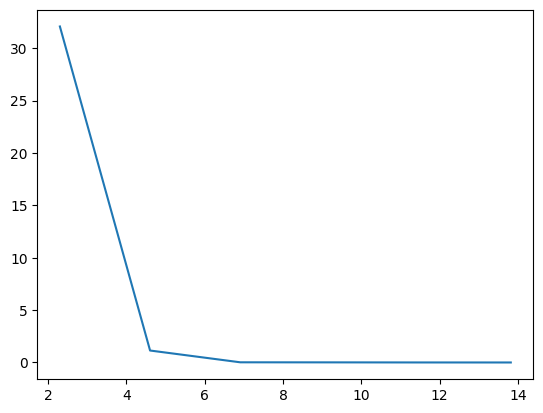

In [ ]:
bestobjective = []
t = []
for i in range(1,7):
  N = 10**i
  t.append(N)
  X1 = X2 = Y = []
  lb = [-4, -4]  # vector of lower bound for (x1,x2)
  ub = [4, 4]  # vector of lower bound for (x1,x2)
  # below we generate N random points uniformly from a given support of decision variables
  X1 = np.random.uniform(lb[0], ub[0], N)
  X2 = np.random.uniform(lb[1], ub[1], N)
  for j in range(N):
    Y.append(Rosenbrock(X1[j], X2[j]))
  bestobjective.append(min(Y))
plt.plot(np.log(t), bestobjective)

**Plotting a Contour Plot for Rosenbrock Function**

**Contour Plot:** A contour plot, also known as a contour map or contour chart, is a graphical representation of three-dimensional data in a two-dimensional format. Contour plots are particularly useful for visualizing data that has both x and y coordinates and a third variable that is represented by contour lines.

**🛑 ToDo (solved):** Given above in **Fig A** is a contour plot with x,y are two axis and color (or shades) represents values of Rosenbrock function. Below is a partially completed code which you need to complete in order to create a contour plot(similar to Fig A) and get validated by TAs.

(**Hint**: Remember in order to create a contour plot you need to first create a meshgrid which is used to evaluate Rosenbrock Function value in this grid. A meshgrid is a two-dimensional grid of points or coordinates created from two one-dimensional arrays.)

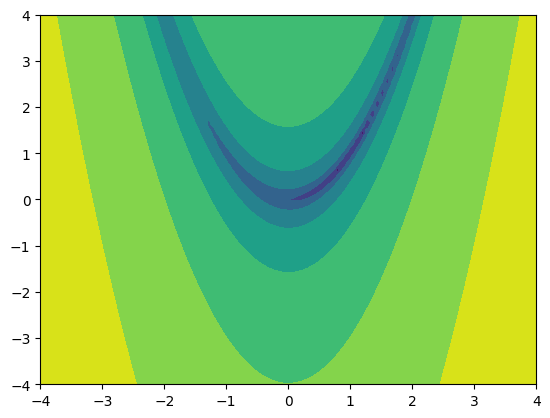

In [ ]:
k = 100 # number of intermediate points between support of x1 and x2

# intermediate points of x1 and x2 as rows and cols respectively
rows = np.linspace(lb[0], ub[0], k+1)
cols = np.linspace(lb[1], ub[1], k+1)

# use np.meshgrid() function to create meshgrid with rows and cols as input arguments
[meshX1, meshX2] = np.meshgrid(rows, cols)

# evaluate Rosenbrock Functional value at each (X1, Y1) in meshgrid
Z = Rosenbrock(meshX1,meshX2)
# It is a better practice to scale above grid into log with base 10
Z2 = np.log10(Z)

#plot the contour plot using contourf() with meshgird and evaluated value at each point of meshgrid
fig, ax = plt.subplots(1,1)
# there are two in-built functions contour() and contourf(), herein use contourf (feel free to explore contour() function)
ax.contourf(meshX1, meshX2, Z2)

#### **Best Random Search for Rosenbrock Function with a constraint**

Conisder the above Rosenbrock Function, suppose we have additional constaint and our objective to find optima for objective function subject to some constraints.

In order to approach such problem we will simply generate random points from the given support of decision variables and check for condition to satisfy these constraints. Consider the following modified (constrained) Rosenbrock Problem:

$$f(x,y) = (1-x)^2 + 100(y-x^2)^2$$

subject to

$$(x-1)^3 - y +1 \leq 0 $$

$$ x+y - 2 \leq 0 $$

with $x \in [-1.5, 1.5]$ and $y \in [-0.5, 2.5]$. \\
Further, $f(1,1) = 0$ is known to be global optima. For more details [Go to](https://en.wikipedia.org/wiki/Test_functions_for_optimization) in "***Rosenbrock function constrained with a cubic and a line***"

**Fig B: Rosenbrock Function with constraints** 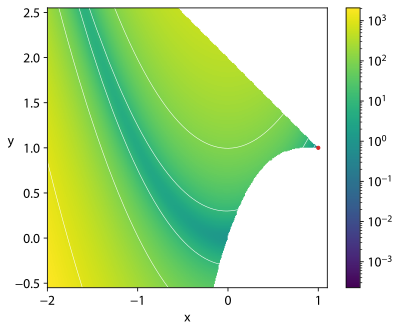

**🛑 Task B:** Now your immediate task is to perform both finding best solution using random search for constrained Rosenbrook Function and create a contour plot which matches with Fig B above.

**Hint**: You need to define a new function, say, RosenbrockConstrained() instead of Rosenbrock().  IN this RosenbrockConstrained() function, (i) check feasibility of constaints, (ii) if feasible return the function value, (iii) if infeasible, return INFINITY [np.inf], or any large value.


**TO DO:** Perform basic search using appropriate value of N;  then make a contour plot. Show results to TAs.

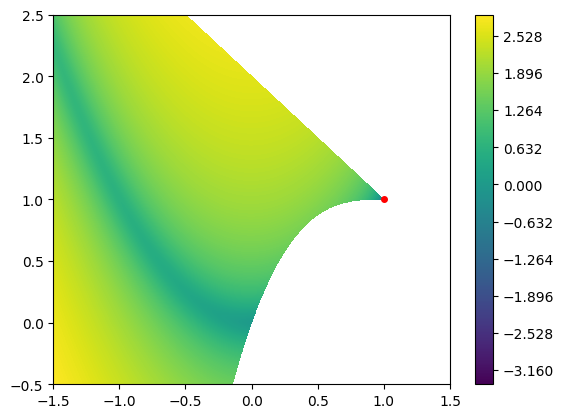

In [ ]:
k = 1000 # number of intermediate points between support of x1 and x2
# intermediate points of x1 and x2 as rows and cols respectively
rows = np.linspace(-1.5,1.5, k+1)
cols = np.linspace(-0.5,2.5, k+1)

# use np.meshgrid() function to create meshgrid with rows and cols as input arguments
[meshX1, meshX2] = np.meshgrid(rows, cols)

# evaluate Rosenbrock Functional value at each (X1, Y1) in meshgrid
Z = Rosenbrock(meshX1,meshX2)
constraint1 = (meshX1 - 1)**3 - meshX2 + 1
constraint2 = meshX1 + meshX2 -  2
constraint = np.logical_and(constraint1 <=0 , constraint2 <= 0)
for i in range(k+1):
  for j in range(k+1):
    if constraint[i][j] == True:
      continue
    else: Z[i][j] = np.inf

# It is a better practice to scale above grid into log with base 10
Z2 = np.log10(Z)

#plot the contour plot using contourf() with meshgird and evaluated value at each point of meshgrid

# there are two in-built functions contour() and contourf(), herein use contourf (feel free to explore contour() function)
plt.contourf(meshX1, meshX2, Z2, levels = 1000)
plt.colorbar()

plt.plot(1,1,"r.", markersize = 8)


# from matplotlib import ticker, cm, colors
# fig, ax = plt.subplots()
# # cs = ax.contourf(meshX1, meshX2, Z, locator=ticker.LogLocator(), levels = 1000000)
# # Alternatively, you can manually set the levels
# # and the norm:
# lev_exp = np.arange(np.floor(np.log10(Z.min())-1),
#                    np.ceil(np.log10(Z.max())+1))
# levs = np.power(10, lev_exp)
# cs = ax.contourf(meshX1, meshX2, Z, levs, norm=colors.LogNorm())

# cbar = fig.colorbar(cs)

# plt.show()



## **2. Visualizing Multi-objective Problems**

**Multi-objective Optimization (MOO):** In such problem your is aim to simultaneously optimize multiple conflicting objectives or criteria. In MOO, there is no single solution that can optimize all objectives at once because these objectives often compete with each other. In order to find a best solution set, your goal is to identify a set of solution from Pareto Front by balancing tradeoff between two (or more than two) objectives.


**Pareto Front:** Let's say you have a multi-objective optimization problem with '$n$' objectives, and you are trying to minimize these objectives. A solution '$A$' is said to dominate another solution '$B$' if:

* For at least one objective, solution '$A$' is better than solution '$B$' (i.e., it has a lower value).
* For all other objectives, solution '$A$' is at least as good as solution '$B$' (i.e., it has a value that is equal to or better than solution '$B$'). \\

A solution '$X$' is part of the Pareto Frontier if there is no other solution '$Y$' in the search space that dominates '$X$.' In other words, '$X$' is on the Pareto Frontier if there is no way to improve any of its objectives without worsening at least one other objective.

### **Bihn-Korn Function**

Given below is a muti-objective function with $f_1(x,y)$ and $f_2(x,y)$ as two objectives and two constraints defined as $C_1(x,y)$ and $C_2(x,y)$.

$$\begin{equation}
f_1(x,y) = 4x^2 + 4y^2 \\
\hspace{3.5em} f_2(x,y) = (x-5)^2 + (y-5)^2
\end{equation}$$

subject to

$$\begin{equation}
C_1(x,y): (x-5)^2 + y^2 \leq 25 \\
\hspace{2.5 em} C_2(x,y): (x-8)^2 + (y+3)^2 \geq 7.7
\end{equation}$$

with support for $x \in [0,3]$ and $y \in [0,5]$.


**Fig C: Pareto Front for Bihn-Korn Function** 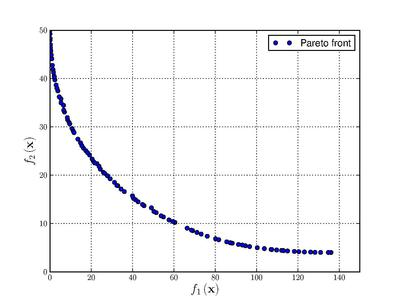

**🛑 Task 2A:** Using approach of constrained Rosenbrock Function, define Bihn-Korn Function which takes $x$ and $y$ and provides $f_1(x,y)$ and $f_2(x,y)$ as output given that $C_1(x,y)$ and $C_2(x,y)$ constraints are also satisfied.

In [ ]:
def bihnkorn(x,y):
    f1 = 4*x**2 + 4*y**2
    f2 = (x-5)**2 + (y-5)**2
    return (f1, f2)

def constraint(x,y):
  return ((((x-5)**2 + y**2) <=25) and (((x-8)**2 + (y+3)**2) >= 7.7))

**🛑 Task 2B:** Let $N$ be the number of points in search space. Create a dataset $X_1$, $X_2$ which are feasible (belong to feasible region) and evaluate both $f_1(X_1, X_2)$ and $f_2(X_1, X_2)$.     

In [ ]:
# IT WILL TAKE ABOUT 30 SECS TO FULLY RUN THIS
N = 100 # number of intermediate points between support of x1 and x2
# intermediate points of x1 and x2 as rows and cols respectively
rows = np.linspace(0,3, N+1)
cols = np.linspace(0,5, N+1)

#now according to question
'''
Pareto Front: Let's say you have a multi-objective optimization problem with ' 2 ' objectives, and you are trying to minimize these objectives.
A solution ' x1, y1 ' is said to dominate another solution ' x2, y2 ' if:
  For at least one objective either f1 or f2, solution 'x1,y1' is better than(meaning values of f1 and f2 are less) solution ' x2, y2 ' (i.e., it has a lower value).
  For all other objectives (just one remaining), solution 'x1,y1' is at least as good as solution ' x2,y2 ' (i.e., it has a value that is equal to or better than solution 'x2,y2').
A solution ' X ' is part of the Pareto Frontier if there is no other solution ' Y ' in the search space that dominates ' X .'
In other words, ' X ' is on the Pareto Frontier if there is no way to improve any of its objectives without worsening at least one other objective
'''

[meshX, meshY] = np.meshgrid(rows, cols)

f1 = np.ones((N+1,N+1)) * np.inf
f2 = (np.ones((N+1,N+1)) * np.inf)
for i in range(N+1):
  for j in range(N+1):
    if constraint(meshX[i][j], meshY[i][j]):
      a,b = bihnkorn(meshX[i][j], meshY[i][j])
      f1[i][j] = a
      f2[i][j] = b

def dominate(A, B, f1, f2):
  #returns true if A dominates B
  x1,y1 = A
  x2, y2 = B
  A_f1 = f1[x1][y1]
  A_f2 = f2[x1][y1]
  B_f1 = f1[x2][y2]
  B_f2 = f2[x2][y2]
  if ((A_f1 < B_f1) and (A_f2 <= B_f2)) or ((A_f1 <= B_f1) and (A_f2 < B_f2)):
    return True
  else: return False

#creating coordinate pairs:
points = []
for i in range(len(rows)):
  for j in range(len(cols)):
    points.append((i,j))
paretopoint = []
for X in points:
  flag = 0
  for Y in points:
    if (X!=Y) and dominate(Y,X, f1,f2):
      flag = 1
      break
  if flag == 0:
    paretopoint.append(X)



In [ ]:
#now we have the points (i,j) we use it to get the values of f1,f2 for valid point

pareto_f1 = [f1[i][j] for i,j in paretopoint]
pareto_f2 = [f2[i][j] for i, j in paretopoint]

**🛑 Task 2C:** Visualize above generate dataset with appropriate tools. (Hint: Your obtained plot will roughly represent Fig C).

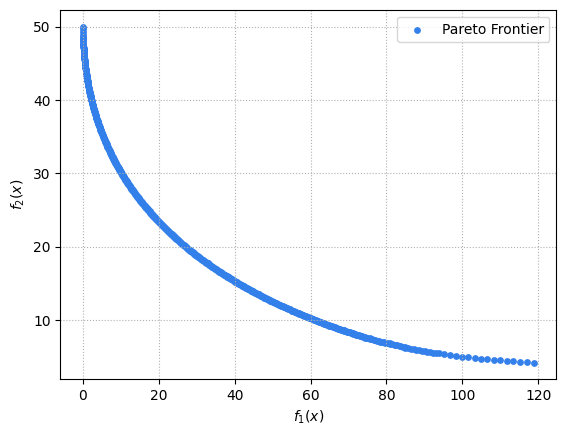

In [ ]:
plt.scatter(pareto_f1, pareto_f2,color = "#3480eb", s =15)
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.grid(linestyle = ":")
plt.legend(labels = ["Pareto Frontier"])

**🛑 Task 2D:** Consider last digit of your **roll number**,
* If it is **odd** (`1,3,5,7,9`) then your task is to create a **contour plot with $f_1(x,y)$ as objective subject to $C_1(x,y)$ and $C_2(x,y)$** constraints.
* If it is **even** (`0,2,4,6,8`) then your task is to create a **contour plot with $f_2(x,y)$ as objective subject to $C_1(x,y)$ and $C_2(x,y)$** constraints.


In [ ]:
#my roll no. is 23N0454, hence last digit is 4 which is even
#i have to create a contour plot of f2 subject to C1 and C2

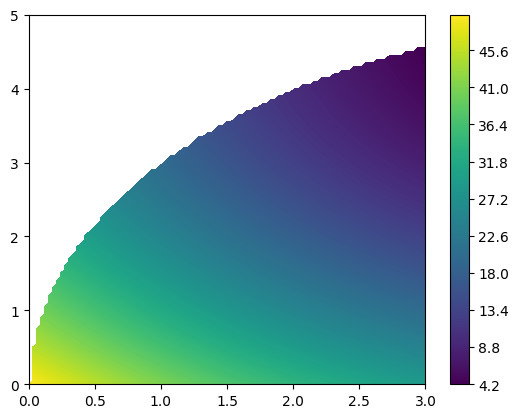

In [ ]:
#plotting f2
#THIS WILL WORK IF TASK2B CELL IS RUN BEFORE THIS
plt.contourf(meshX, meshY, f2, levels = 1000)
plt.colorbar()

# **(!) Submission Required**

**Que 1:** Use random search to identify the optimum for

* **Beale Function**, if your last digit of Roll Number is odd (ending with `1, 3, 5, 7, 9`)
* **Goldstein-Price function**, if ending digit is even i.e., `0, 2, 4, 6, 8.




In [ ]:
"""
Goldstein Price Function:
Z = [1 + (X+Y+1)**2*(19-14*X+3*X**2-14*Y+6*X*Y+3*Y**2)]  * [30 + (2*X-3*Y)**2*(18-32*X+12*X**2+48*Y-36*X*Y+27*Y**2))
"""

def GPF(X,Y):
  """takes (x,y) as input and returns evaluated value for f(x,y)"""
  value = (1 + (X+Y+1)**2*(19-14*X+3*X**2-14*Y+6*X*Y+3*Y**2))*(30 + (2*X-3*Y)**2*(18-32*X+12*X**2+48*Y-36*X*Y+27*Y**2))
  return value

X1 = X2 = Y = []
N = 100000 # number of random points used in search space

#function is generally evaluated on [-2, 2] square
lb = [-2, -2]  # vector of lower bound for (x1,x2)
ub = [2, 2]  # vector of lower bound for (x1,x2)

# below we generate N random points uniformly from a given support of decision variables
X1 = np.random.uniform(lb[0], ub[0], N)
X2 = np.random.uniform(lb[1], ub[1], N)

# Evaluate Rosenbrock Function value for randomly selected points in X1, X2
for i in range(N):
  Y.append(GPF(X1[i], X2[i]))


#display Results
print('\n Monte Carlo Simulation based \n')
print( 'Best decision variable : ', X1[np.argmin(Y)], X2[np.argmin(Y)])
print('Best objective    : ', min(Y))
print('-----------------------------------------------------------------')
print( 'Worst decision variable : ', X1[np.argmax(Y)], X2[np.argmax(Y)])
print('Worst objective    : ', max(Y))
print('=================================================================')

X_optimum = [0,-1] #Known from theory
print("Known Optimal decision variables:",X_optimum)
print("Known Optimal objective =",GPF(X_optimum[0], X_optimum[1]))


 Monte Carlo Simulation based 

Best decision variable :  0.007814166471057593 -1.0002880389855124
Best objective    :  3.01599389137943
-----------------------------------------------------------------
Worst decision variable :  -1.7687574356682703 1.998621322258046
Worst objective    :  1012207.6936172496
Known Optimal decision variables: [0, -1]
Known Optimal objective = 3


**Que 2:**. 'Optimise' either **Himmelblau's function (if roll number ending odd)** OR **Cross-in-Tray function (if roll number ending even)**. These functions have 4 alternate solutions.  Do 20 sets of 'simulation-optimisation' runs, with N ~= 200000. Compute the number of times we are close to a particular known solution.  Create a contour plot also.

In [ ]:
# cross in tray function
from math import sin, exp, sqrt,pi, dist
def CIT(x,y):
  value = -0.0001*(abs(sin(x)*sin(y)*exp(abs(100 - (sqrt(x**2 + y**2)/pi))))+1)**.1
  return value

#function is generally evaluated on [-10, 10] square
lb = [-10, -10]  # vector of lower bound for (x1,x2)
ub = [10, 10]  # vector of lower bound for (x1,x2)

count = 0  #no. of times we are close to solution
for simulation in range(20):
  X1 = X2 = Y = []
  N = 200000 # number of random points used in search space
  # below we generate N random points uniformly from a given support of decision variables
  X1 = np.random.uniform(lb[0], ub[0], N)
  X2 = np.random.uniform(lb[1], ub[1], N)

  # Evaluate Function value for randomly selected points in X1, X2
  for i in range(N):
    Y.append(CIT(X1[i], X2[i]))


  #display Results
  print('\n Monte Carlo Simulation no. {i} \n'.format(i=simulation+1))
  print( 'Best decision variable : ', X1[np.argmin(Y)], X2[np.argmin(Y)])
  print('Best objective    : ', min(Y))

  X_optimum = [[-1.3491,1.3491],[1.3491,-1.3491],[1.3491,1.3491],[-1.3491,-1.3491]] #Known from theory
  print("Known Optimal decision variables:",X_optimum)
  print("Known Optimal objective =",CIT(X_optimum[0][0], X_optimum[0][1]))


  e_dist = []
  for point in X_optimum:
    dis = dist(point, [X1[np.argmin(Y)], X2[np.argmin(Y)]])
    e_dist.append(dis)
  min_dis = min(e_dist)
  if min_dis < .01:
    print("We were close to one of the solutions")
    count += 1
  print('-----------------------------------------------------------------')
print("TOTAL TIMES WE WERE CLOSE TO A SOLUTION BASED ON {epsilon:=0.01} : ", count)


 Monte Carlo Simulation no. 1 

Best decision variable :  1.3457992899224678 1.3522603195764873
Best objective    :  -2.0626092188757785
Known Optimal decision variables: [[-1.3491, 1.3491], [1.3491, -1.3491], [1.3491, 1.3491], [-1.3491, -1.3491]]
Known Optimal objective = -2.0626118504479614
We were close to one of the solutions
-----------------------------------------------------------------

 Monte Carlo Simulation no. 2 

Best decision variable :  -1.3458663599125682 -1.354468932400808
Best objective    :  -2.062607101161878
Known Optimal decision variables: [[-1.3491, 1.3491], [1.3491, -1.3491], [1.3491, 1.3491], [-1.3491, -1.3491]]
Known Optimal objective = -2.0626118504479614
We were close to one of the solutions
-----------------------------------------------------------------

 Monte Carlo Simulation no. 3 

Best decision variable :  1.3471958281433967 1.3513602944831486
Best objective    :  -2.0626107784159946
Known Optimal decision variables: [[-1.3491, 1.3491], [1.3491, -

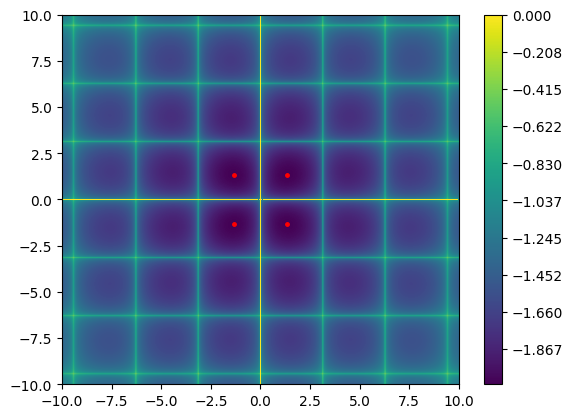

In [ ]:
# contour plot for the same
k = 1000 # number of intermediate points between support of x1 and x2
lb = [-10, -10]  # vector of lower bound for (x1,x2)
ub = [10, 10]  # vector of lower bound for (x1,x2)

# intermediate points of x1 and x2 as rows and cols respectively
rows = np.linspace(lb[0], ub[0], k+1)
cols = np.linspace(lb[1], ub[1], k+1)

# use np.meshgrid() function to create meshgrid with rows and cols as input arguments
[meshX1, meshX2] = np.meshgrid(rows, cols)

def CITforNumpy(x,y):
  value = -0.0001*(np.abs(np.sin(x)*np.sin(y)*np.exp(np.abs(100 - (np.sqrt(x**2 + y**2)/pi))))+1)**.1
  return value
# evaluate Rosenbrock Functional value at each (X1, Y1) in meshgrid
Z = CITforNumpy(meshX1,meshX2)

#plotting coutorplot
plt.contourf(meshX1, meshX2, Z, levels = 1000)
plt.colorbar()

X_optimum = [[-1.3491,1.3491],[1.3491,-1.3491],[1.3491,1.3491],[-1.3491,-1.3491]] #Known from theory
for point in X_optimum:
  plt.plot(point[0],point[1],"r.", markersize = 5)